# Survial Prediction using Logistic Regression
> This project predicts about the survival of persons who faced accident using a dataset. We performed data cleaning, Exploratory Data Analysis (EDA) and train our model on the data..
---

# Data Description
The dataset used here is accident.csv from **Kaggle**. It has 5 features, and 200 records:

- **Age**
- **Gender**
- **Speed of impact**
- **Seatbelt Used**
- **Helmet Used**


Goal: To predict wheather a persons survives after an accident or dies.

---

### Step 1: Load and Preview Tha dataset

We start by loading the dataset and take preview of the dataset. How tha data look likes, its null count and features data type.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt

df = pd.read_csv("../Dataset/accident.csv")
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              196 non-null    int64  
 1   Gender           196 non-null    object 
 2   Speed_of_Impact  196 non-null    float64
 3   Helmet_Used      196 non-null    object 
 4   Seatbelt_Used    196 non-null    object 
 5   Survived         196 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.7+ KB


### Step 2: Handling error values and converting columns values into binary

We will remove the error values of the dataset. Some of the columns like **Gender**, **Seatbelt Used**, and **Helmet Used** have string values but thay can be converted into binary category. So we need to convert them into 0, 1 to make them usefull for the model.

In [17]:
# Drop null values
df.dropna(inplace=True)

# Create dictionaries tto replace the values from string to binary 
gender_map = {'Male': 1, 'Female': 0}
response_map = {'Yes': 1, 'No': 0}

replace_dict = {
    'Gender': gender_map,
    'Seatbelt_Used': response_map,
    'Helmet_Used' : response_map
}

# Replacing the values from string to binary
df.replace(replace_dict, inplace=True)

# Printing first 5 rows of dataframe 
print(df.head())

   Age  Gender  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived
0   56       0             27.0            0              0         1
1   69       0             46.0            0              1         1
2   46       1             46.0            1              1         0
3   32       1            117.0            0              1         0
4   60       0             40.0            1              1         0


C:\Users\dell\AppData\Local\Temp\ipykernel_18724\4087399451.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(replace_dict, inplace=True)


# EDA with Plots Inetrpretations
**Step 3: Data Distribution (Histograms)**

Histograms show the distribution of each feature. This helps us understand skewness, spread, and whether scaling might be needed.

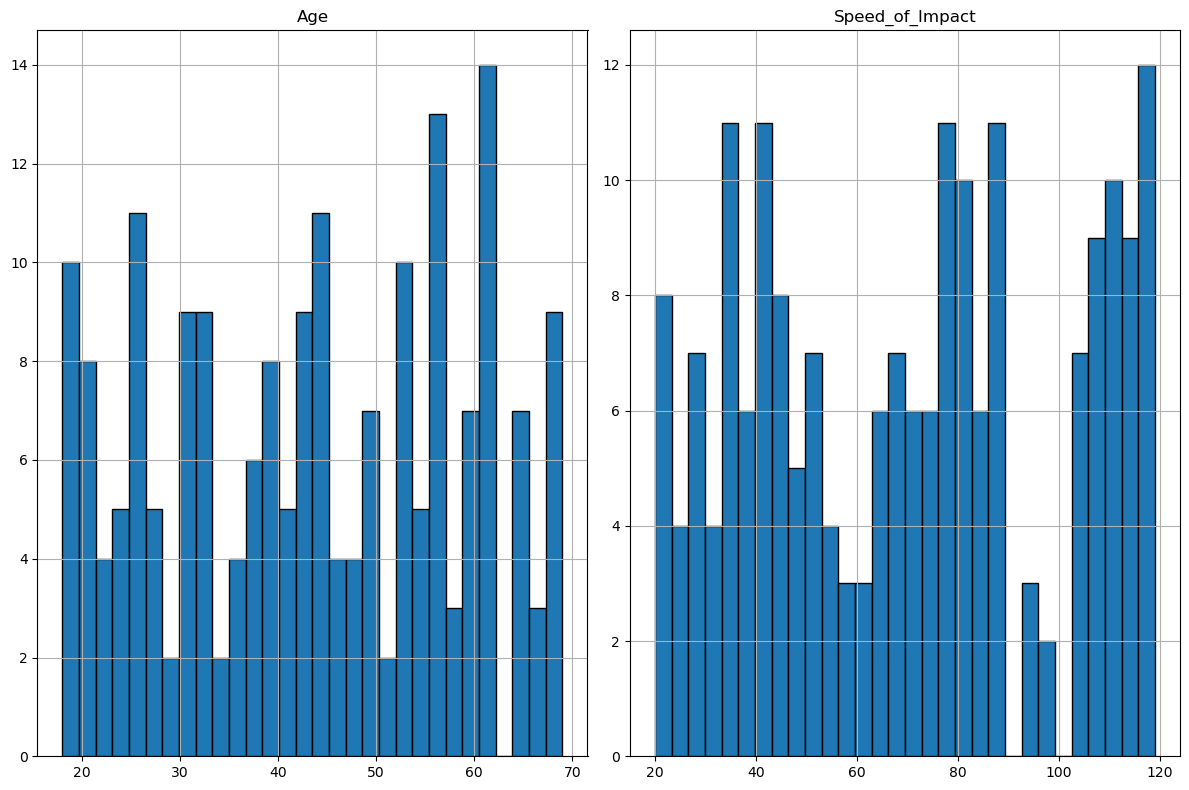

In [25]:
# Plot distribution of each feature
df[['Age', 'Speed_of_Impact']].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.tight_layout()
plt.show()

**Step 4: Pairplot**

Pairplots allow us to visually inspect linear or nonlinear relationships between features and the target (`Survived`).

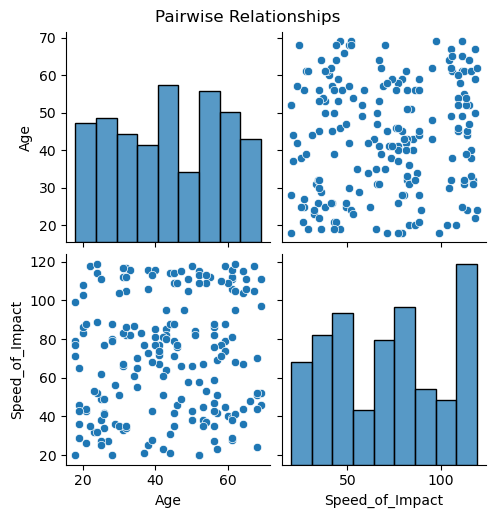

In [26]:
# Pairplot
sns.pairplot(df[['Age', 'Speed_of_Impact']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

**Step 5: Correlation Heatmap**

This heatmap shows the strength of relationships between variables.

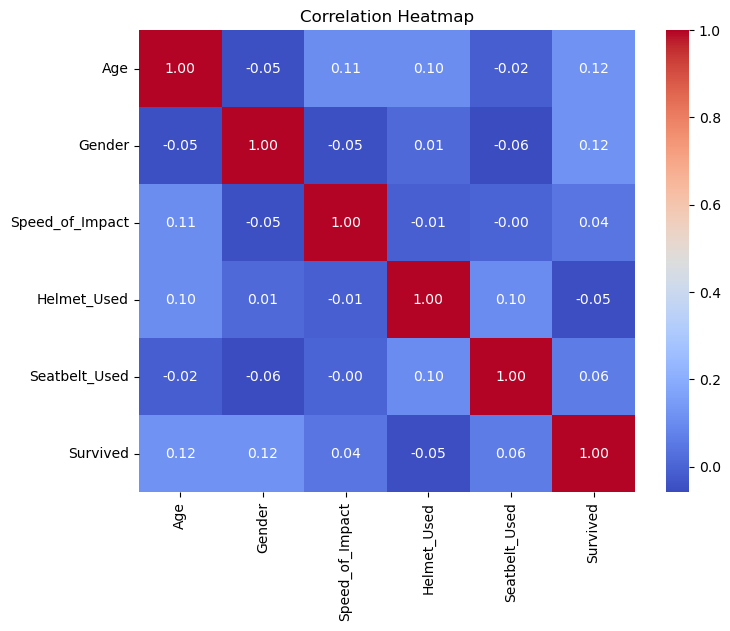

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

**Step 6: Linear Regression**

We fit a Logistic Regression model to predict Survival based on the features data.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Define features (X) and target variable (y)
X = df[['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used']]
y = df['Survived']

# Optional: Scale features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Optional: Show the coefficients
coefficients = pd.DataFrame(
    model.coef_.T, index=X.columns, columns=['Coefficient']
)
print("\nModel Coefficients:\n", coefficients)

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.32      0.44        25
           1       0.41      0.80      0.55        15

    accuracy                           0.50        40
   macro avg       0.57      0.56      0.49        40
weighted avg       0.61      0.50      0.48        40


Confusion Matrix:
 [[ 8 17]
 [ 3 12]]

Model Coefficients:
                  Coefficient
Age                 0.233760
Gender              0.315572
Speed_of_Impact     0.016026
Helmet_Used        -0.242229
Seatbelt_Used       0.064817


### Step 7: Model Score


Accuracy: 0.5

Classification Report:
               
               precision    recall  f1-score   support

           0       0.73      0.32      0.44        25 
           1       0.41      0.80      0.55        15 

    accuracy:                          0.50        40 
    macro avg:     0.57     0.56       0.49        40 
    weighted avg:  0.61     0.50       0.48        40 


Confusion Matrix:
[[8   17] 
[3   12]] 

**Model Coefficients:**
| Features           |Coefficient
|--------------------|------------
|Age                 |0.233760
|Gender              |0.315572
|Speed_of_Impact     |0.016026
|Helmet_Used         |-0.242229
|Seatbelt_Used       |0.064817        
